<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/TFM__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fechas de inicio y fin
start_date = "2016-01-04"
end_date = "2022-12-30"


ticker_componentes_IBEX = ['BKT', 'IBE', 'REP', 'TEF', 'ACS', 'FER', 'IDR', 'BBVA', 'ITX', 'SAN',
       'ENG', 'SAB', 'MAP', 'GRF', 'MTS', 'AMS', 'IAG', 'CABK', 'SCYR', 'ELE',
       'ACX', 'AENA', 'ANA', 'MRL', 'CLNX', 'MEL', 'COL', 'NTGY', 'SLR', 'FDR',
       'ROVI', 'RED', 'ANE', 'LOG', 'UNI']

ticker_componentes_IBEX = [ticker + ".MC" for ticker in ticker_componentes_IBEX]
"""
tickers = {
    "SP500": "^GSPC",
    "DAX": "^GDAXI",
    "EUROSTOXX": "^STOXX50E",
    "Oro": "GC=F",       # Oro (futuros)
    "Cobre": "HG=F",     # Cobre (futuros)
    "Dólar/Euro": "USDEUR=X",     # Precio del dólar en euros
    "Yuan/Euro": "CNYEUR=X"     # Precio del rublo en euros
}"""
tickers_indices = ["^IBEX", "^GSPC", "^GDAXI", "^STOXX50E", "GC=F", "HG=F", "USDEUR=X","CNYEUR=X"]

data_componentes_IBEX = yf.download(  ticker_componentes_IBEX,  start=start_date, end=end_date)["Adj Close"]
data_indices =          yf.download(  tickers_indices,          start=start_date, end=end_date)["Adj Close"]



[*********************100%%**********************]  35 of 35 completed
[*********************100%%**********************]  8 of 8 completed


In [3]:
dates = pd.date_range(start_date, end_date)
business_days = pd.date_range(start=start_date, end=end_date, freq='B')

In [4]:
data_componentes_IBEX = data_componentes_IBEX.reindex(dates)
data_indices =          data_indices.reindex(dates)

In [5]:
data_componentes_IBEX.shape, data_indices.shape

((2553, 35), (2553, 8))

In [6]:
# NUMERO DE NANS TOTALES

print( data_componentes_IBEX.isna().sum())
print( data_indices.isna().sum())

ACS.MC      762
ACX.MC      762
AENA.MC     762
AMS.MC      762
ANA.MC      762
ANE.MC     2168
BBVA.MC     762
BKT.MC      762
CABK.MC     762
CLNX.MC     762
COL.MC      762
ELE.MC      762
ENG.MC      762
FDR.MC      762
FER.MC      762
GRF.MC      762
IAG.MC      762
IBE.MC      762
IDR.MC      762
ITX.MC      762
LOG.MC      762
MAP.MC      762
MEL.MC      762
MRL.MC      762
MTS.MC      762
NTGY.MC     762
RED.MC      762
REP.MC      762
ROVI.MC     762
SAB.MC      762
SAN.MC      762
SCYR.MC     762
SLR.MC      762
TEF.MC      762
UNI.MC     1145
dtype: int64
CNYEUR=X     731
GC=F         795
HG=F         795
USDEUR=X     732
^GDAXI       779
^GSPC        792
^IBEX        763
^STOXX50E    791
dtype: int64


In [7]:
# NUMERO DE NANS TOTALES EN DIAS LABORALES

print(
    data_componentes_IBEX[data_componentes_IBEX.index.isin(business_days)].isna().sum()
)

print(
    data_indices[data_indices.index.isin(business_days)].isna().sum()
)

ACS.MC       34
ACX.MC       34
AENA.MC      34
AMS.MC       34
ANA.MC       34
ANE.MC     1440
BBVA.MC      34
BKT.MC       34
CABK.MC      34
CLNX.MC      34
COL.MC       34
ELE.MC       34
ENG.MC       34
FDR.MC       34
FER.MC       34
GRF.MC       34
IAG.MC       34
IBE.MC       34
IDR.MC       34
ITX.MC       34
LOG.MC       34
MAP.MC       34
MEL.MC       34
MRL.MC       34
MTS.MC       34
NTGY.MC      34
RED.MC       34
REP.MC       34
ROVI.MC      34
SAB.MC       34
SAN.MC       34
SCYR.MC      34
SLR.MC       34
TEF.MC       34
UNI.MC      417
dtype: int64
CNYEUR=X      3
GC=F         67
HG=F         67
USDEUR=X      4
^GDAXI       51
^GSPC        64
^IBEX        35
^STOXX50E    63
dtype: int64


In [8]:
# ELIMINAR DEL DATA SET ANE.MC y UNI.MC

data_componentes_IBEX.drop(["ANE.MC"],axis = 1, inplace=True)
data_componentes_IBEX.drop(["UNI.MC"],axis = 1, inplace=True)

In [9]:
# RELLENAR NANS

data_componentes_IBEX = data_componentes_IBEX.fillna(method="ffill")
data_indices = data_indices.fillna(method="ffill")

print(data_componentes_IBEX.isna().sum().sum())
print(data_indices.isna().sum().sum())

0
0


In [10]:
data_componentes_IBEX.head()

ACS.MC    ACX.MC    AENA.MC     AMS.MC     ANA.MC   BBVA.MC  \
2016-01-04  15.980103  5.751740  79.277672  36.199364  60.231133  4.407446   
2016-01-05  16.011051  5.890940  79.734398  36.367855  60.508484  4.436830   
2016-01-06  15.887270  5.630723  79.315735  36.458931  60.346706  4.342002   
2016-01-07  15.447847  5.364236  77.907547  35.552696  58.127899  4.286575   
2016-01-08  15.206476  5.406247  78.630669  35.038101  58.089367  4.189745   

              BKT.MC   CABK.MC    CLNX.MC    COL.MC  ...    MTS.MC    NTGY.MC  \
2016-01-04  4.751967  2.298497  14.772964  5.183412  ...  7.146005  10.938683   
2016-01-05  4.754172  2.279122  14.747094  5.223532  ...  7.577411  11.072259   
2016-01-06  4.649078  2.198032  14.574613  5.055031  ...  7.086566  10.989146   
2016-01-07  4.581467  2.142059  14.600485  4.894554  ...  6.708846  10.891188   
2016-01-08  4.524879  2.115507  14.238275  4.886530  ...  6.467259  10.768414   

               RED.MC    REP.MC    ROVI.MC    SAB.MC    SAN.MC   SCYR.MC  \
2016-01-04  11.855689  6.404624  12.837639  1.201982  3.033155  1.313086   
2016-01-05  11.923388  6.347961  12.837639  1.198304  3.007060  1.333093   
2016-01-06  11.899773  6.166519  12.846616  1.186534  2.910235  1.284186   
2016-01-07  11.828921  5.922048  12.765821  1.158581  2.850492  1.210084   
2016-01-08  11.776965  5.684580  13.017186  1.120330  2.773582  1.202673   

            SLR.MC    TEF.MC  
2016-01-04   0.700  5.248940  
2016-01-05   0.745  5.275912  
2016-01-06   0.720  5.237833  
2016-01-07   0.700  5.197641  
2016-01-08   0.700  5.072830  

[5 rows x 33 columns]

In [11]:
import matplotlib.pyplot as plt

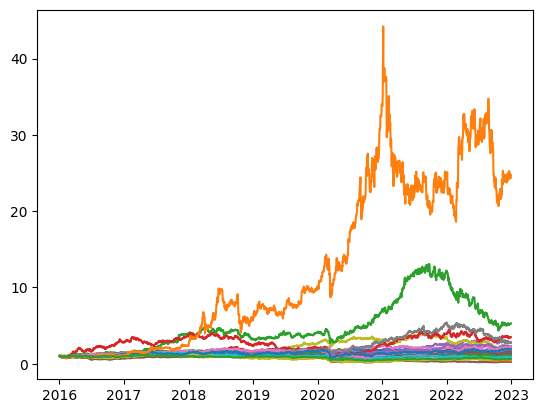

In [12]:
plt.plot(data_componentes_IBEX / data_componentes_IBEX.iloc[0,:]);

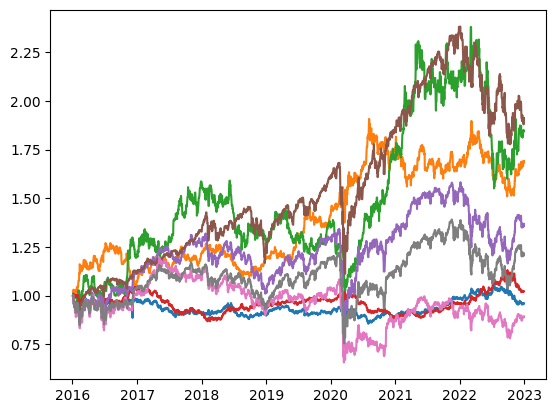

In [13]:
plt.plot(data_indices / data_indices.iloc[0,:]);

# CREAR DATASET

In [14]:
def calculate_sharpe_ratio(returns, risk_free_rate):
    return (np.mean(returns) - risk_free_rate) / np.std(returns)

In [19]:

def create_dataset(ibex_data, bench, _days_backward=28, _days_forward = 7 , _days_steps = 1, create_suffle_data = True):
  days_steps = 1
  days_backward = _days_backward # 28 *3
  days_forward =  _days_forward   #  28

  datos_analisis = ibex_data
  datos_analisis_bench = bench
  X_DATA = []
  Y_DATA = []
  X_DATA_POS = []
  Y_REAL_FORWARD_SHARPE = []

  for i in range(days_backward, len(datos_analisis), days_steps):

      X_forward = datos_analisis[i:i+days_forward]

      X_data = datos_analisis[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data = X_data/ X_data.iloc[0,:]

      X_data_bench = datos_analisis_bench[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data_bench = X_data_bench/ X_data_bench.iloc[0]

      ## RETONORNOS
      last_day = X_data.iloc[X_data.shape[0]-1,:]
      returns_n = 2 * (last_day - last_day.min()) / (last_day.max() - last_day.min()) - 1

      ## MAXIMOS
      x_max =  X_data.max()
      max_n = 2 * (x_max - x_max.min()) / (x_max.max() - x_max.min()) - 1

      ## MINIMOS
      x_min = X_data.min()
      min_n = 2 * (x_min - x_min.min()) / (x_min.max() - x_min.min()) - 1

      ## STD
      x_std = X_data.std()
      std_n = 2 * (x_std - x_std.min()) / (x_std.max() - x_std.min()) - 1

      ## MEDIA
      x_mean = X_data.mean()
      mean_n = 2 * (x_mean - x_mean.min()) / (x_mean.max() - x_mean.min()) - 1

      ## SHARPE
      x_sharpe = x_mean / (x_std + 0.000001)
      sharpe_n = 2 * (x_sharpe - x_sharpe.min()) / (x_sharpe.max() - x_sharpe.min()) - 1


      ## ALPHA Y BETA

      betas = {}
      alphas = {}

      market_returns = X_data_bench.diff().dropna()
      df = X_data.diff().dropna()

      # Para cada activo, calcular beta y alpha
      for column in df.columns:
          asset_returns = df[column]

          # Calcula el beta
          cov_matrix = np.cov(asset_returns, market_returns)
          beta = cov_matrix[0, 1] / cov_matrix[1, 1]
          betas[column] = beta

          # Calcula el alpha
          alpha = asset_returns.mean() - beta * market_returns.mean()
          alphas[column] = alpha

      betas_series = pd.Series(betas)
      alphas_series = pd.Series(alphas)

      beta_n = 2 * (betas_series - betas_series.min()) / (betas_series.max() - betas_series.min()) - 1
      alpha_n = 2 * (alphas_series - alphas_series.min()) / (alphas_series.max() - alphas_series.min()) - 1

      rs = calculate_sharpe_ratio(np.log(X_forward).diff().dropna(), 0)
      Y_REAL_FORWARD_SHARPE.append(rs)
      y = np.argsort(np.argsort(-rs))
      y_n = 2 * (y - y.min()) / (y.max() - y.min()) - 1
      #print(y)
      #print(y_n)
      # TODO: Unir returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n , en un solo dataframe

      # Unir todas las series en un DataFrame
      features_df = pd.concat([returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n], axis=1)

      # Nombrar las columnas
      features_df.columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha']


      if create_suffle_data == True :
        for _ in range(10):
          t = features_df.reset_index(drop=True)
          t = pd.concat([t, y_n.reset_index(drop=True) ], axis=1).sample(frac=1)

          p = t.iloc[:,-1]
          t = t.iloc[:,:-1]

          X_DATA.append(t)
          Y_DATA.append(p)
          X_DATA_POS.append(t.index)
      else:
          X_DATA.append(features_df)
          Y_DATA.append(y_n)
          X_DATA_POS.append(features_df.index)



      #print(features_df)
      #print(y)
      #print(rs)

  return X_DATA , Y_DATA , Y_REAL_FORWARD_SHARPE, X_DATA_POS





## dataset

In [20]:
days_backward = 7
days_forward = 7
days_steps = 7
bench = data_indices["^IBEX"]

X_COMP_TRAIN , Y_COMP_TRAIN, Y_REAL_FORWARD_SHARPE_TRAIN, X_COMP_POS_TRAIN = create_dataset(data_componentes_IBEX.loc["2016-01-04":"2020-08-03"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_COMP_VALID , Y_COMP_VALID, Y_REAL_FORWARD_SHARPE_VALID, X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2020-08-04":"2021-12-29"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_COMP_TEST  , Y_COMP_TEST , Y_REAL_FORWARD_SHARPE_TEST , X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2021-12-30":],             bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)


#X_MACRO_TRAIN , Y_MACRO_TRAIN , _, _ =  create_dataset(data_indices.loc["2016-01-04":"2020-08-03"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
#X_MACRO_VALID , _, _, _ =  create_dataset(data_indices.loc["2020-08-04":"2021-12-29"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
#X_MACRO_TEST  , _, _, _ =  create_dataset(data_indices.loc["2021-12-30":],              bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)




Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype

In [467]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha'])

returns       max       min       std      mean    sharpe      beta  \
0  -0.538972 -0.816254  0.087724 -0.779174 -0.416144 -0.410517 -0.139845   
1  -0.352252 -0.567544  0.161428 -0.541148 -0.166395 -0.686807 -0.237783   
2  -0.453564 -0.640453  0.685907 -0.678001 -0.194618 -0.527309 -0.484465   
3  -0.600505 -0.835998  0.403673 -0.842261 -0.451151 -0.239691 -0.552206   
4  -0.801373 -0.995077  0.217614 -0.991523 -0.713240  0.659831 -0.545566   
5  -0.718921 -0.924502  0.026000 -0.857420 -0.679971 -0.308098  0.192676   
6  -0.547981 -0.857631  0.560890 -0.883988 -0.488292 -0.083744 -0.219198   
7  -0.738329 -1.000000 -0.558804 -0.805590 -0.856288 -0.543370 -0.006669   
8  -0.875214 -1.000000 -0.014886 -0.890867 -0.733898 -0.204888 -0.618937   
9  -0.686545 -0.871316  0.334450 -0.889070 -0.480169 -0.052802 -0.457608   
10 -0.536555 -0.823500  0.645844 -0.860863 -0.415085 -0.147007 -0.624367   
11 -0.732063 -0.884791  0.728425 -0.951008 -0.434870  0.433021 -0.669333   
12 -0.342595 -0.469940  1.000000 -0.546405 -0.045773 -0.651684 -1.000000   
13 -0.818100 -0.997152  0.185949 -0.973281 -0.687527  0.440773 -0.446509   
14 -0.780256 -0.982528  0.486725 -0.984028 -0.596931  0.678132 -0.666785   
15 -1.000000 -0.967776 -1.000000 -0.590746 -1.000000 -0.861898  0.040968   
16 -0.740652 -0.960386  0.489687 -1.000000 -0.553506  1.000000 -0.535390   
17 -0.572617 -0.577759  0.533612 -0.609423 -0.206059 -0.625255 -0.266958   
18 -0.616593 -0.890325  0.565766 -0.900663 -0.493800  0.001899 -0.432315   
19 -0.535354 -0.824616  0.674486 -0.911249 -0.370221  0.152652 -0.685009   
20 -0.377684 -0.665776  0.042546 -0.567049 -0.468546 -0.739735 -0.074731   
21 -0.771155 -0.990413 -0.096004 -0.892546 -0.667246 -0.154389 -0.391153   
22 -0.792052 -0.994373 -0.010565 -0.953130 -0.713305  0.208846 -0.358239   
23  1.000000  1.000000 -0.163070  1.000000  1.000000 -1.000000  1.000000   
24 -0.706129 -0.857887  0.419180 -0.888901 -0.500062 -0.066234 -0.400140   
25 -0.741353 -0.864973  0.688262 -0.905322 -0.442870  0.063999 -0.684754   
26 -0.386823 -0.642670  0.237148 -0.580562 -0.260398 -0.672109  0.170974   
27 -0.806781 -0.919250  0.157300 -0.878227 -0.574061 -0.163324 -0.898033   
28 -0.871745 -0.880898 -0.188498 -0.675627 -0.731628 -0.704914  0.166838   
29 -0.643187 -0.914747  0.073726 -0.834284 -0.625417 -0.356266  0.398231   
30 -0.544997 -0.793040 -0.048433 -0.692613 -0.556630 -0.625048  0.190295   
31 -0.655545 -0.755613  0.096073 -0.655952 -0.579578 -0.680115 -0.454652   
32 -0.804101 -0.973068  0.270681 -0.949843 -0.595880  0.281780  0.034300   

       alpha  
0  -0.567105  
1  -0.393509  
2  -0.508689  
3  -0.655440  
4  -0.849101  
5  -0.717736  
6  -0.581367  
7  -0.750448  
8  -0.925598  
9  -0.731969  
10 -0.598688  
11 -0.790781  
12 -0.437535  
13 -0.858332  
14 -0.837178  
15 -1.000000  
16 -0.789705  
17 -0.608520  
18 -0.662595  
19 -0.601772  
20 -0.406673  
21 -0.809087  
22 -0.826979  
23  1.000000  
24 -0.746873  
25 -0.800839  
26 -0.398305  
27 -0.879001  
28 -0.867239  
29 -0.630155  
30 -0.549817  
31 -0.701803  
32 -0.811144

<Axes: >

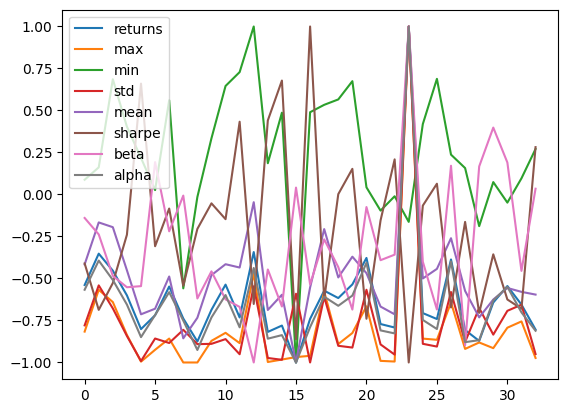

In [465]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha']).plot()

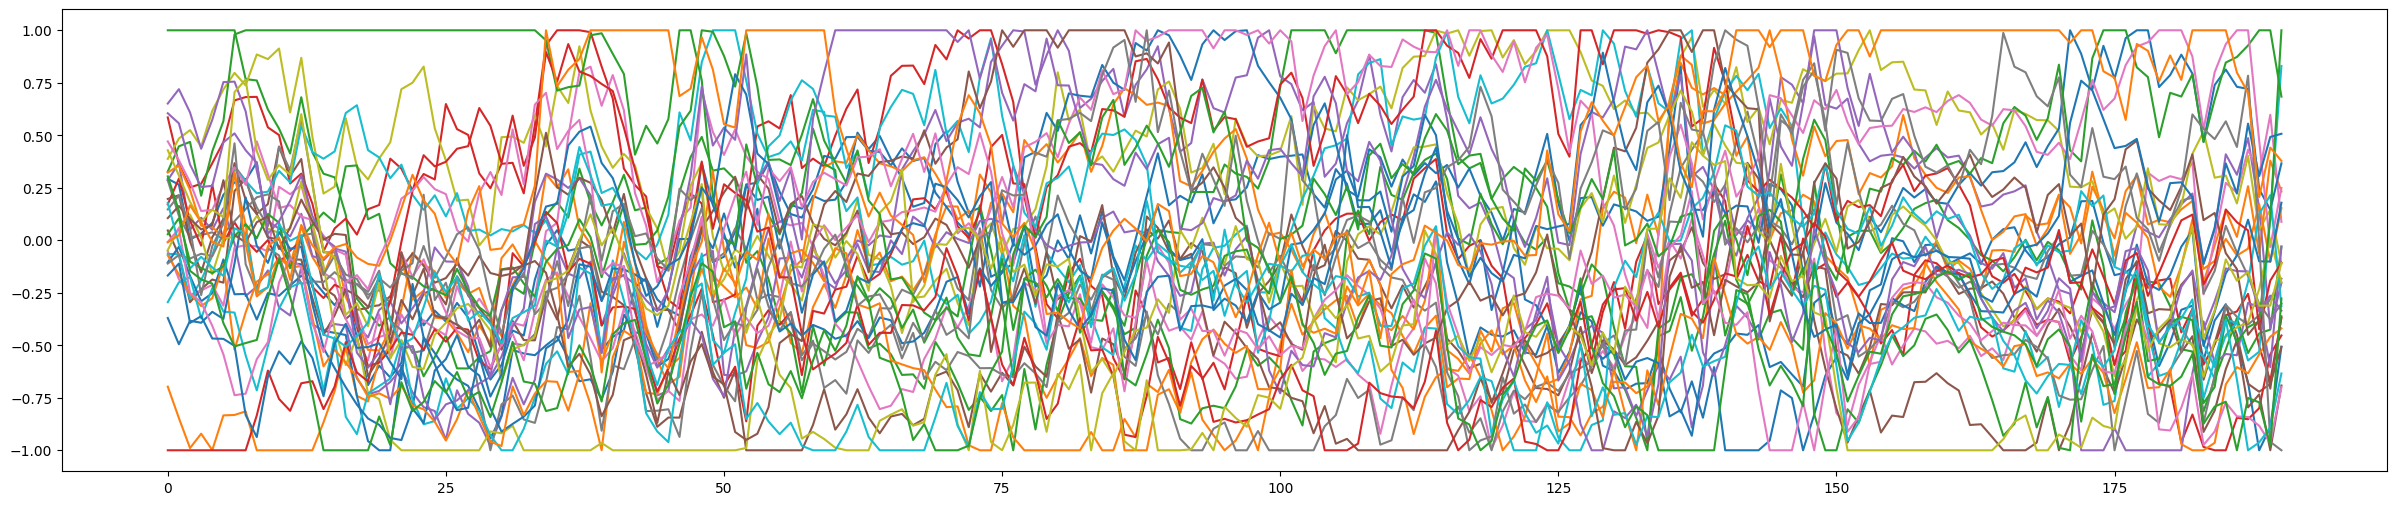

In [444]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_TRAIN , columns=data_componentes_IBEX.columns).iloc[:,:] );

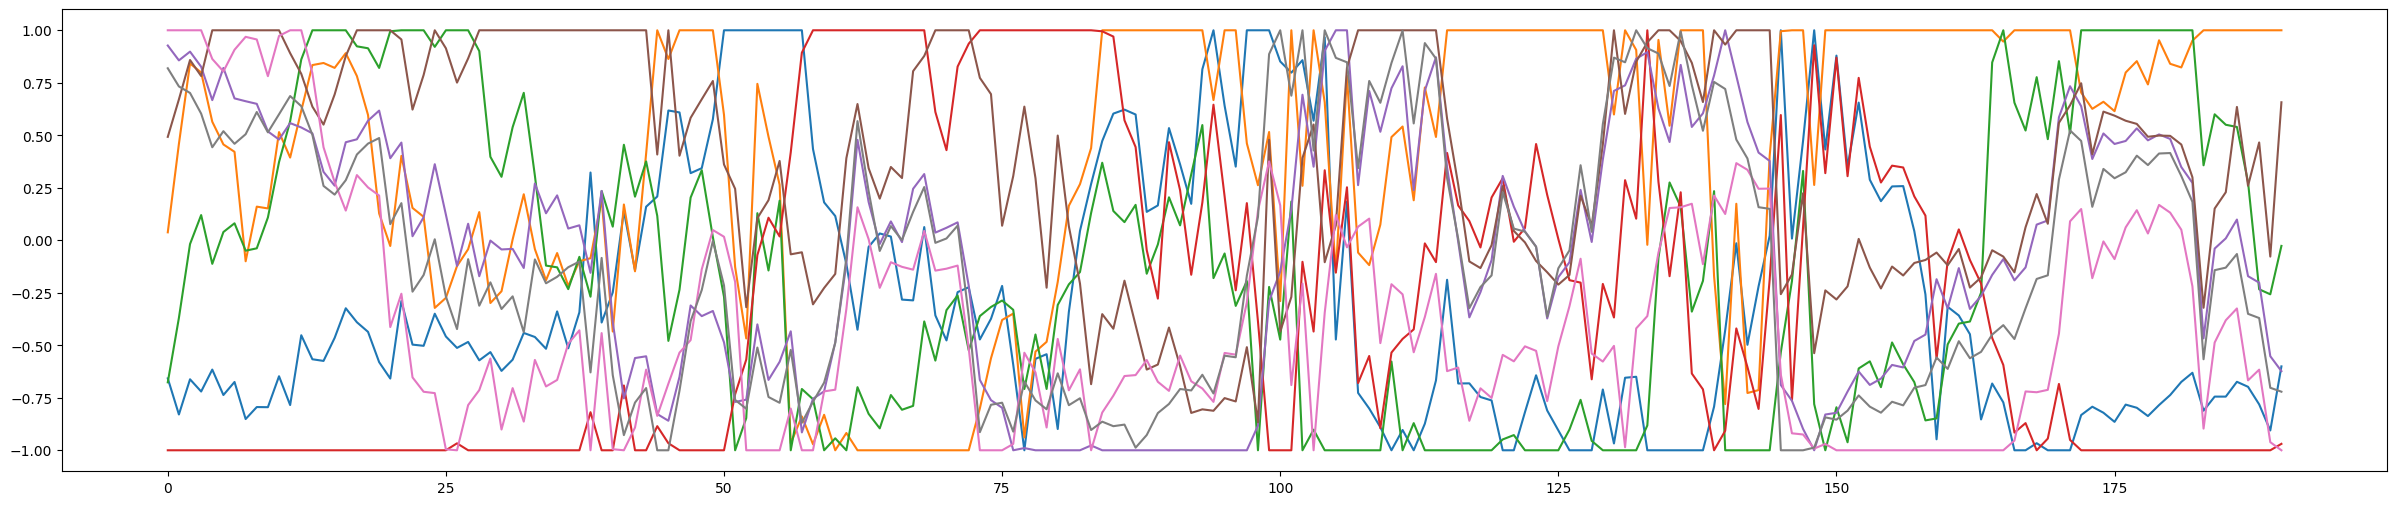

In [437]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_MACRO_TRAIN , columns=data_indices.columns).iloc[:,:] );

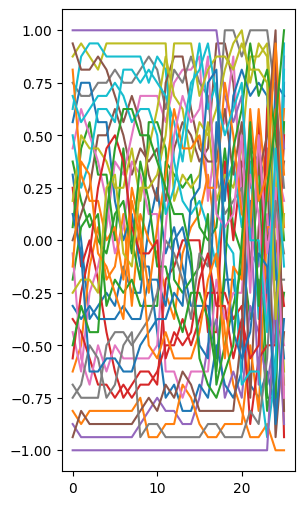

In [352]:
plt.figure(figsize=(3, 6))
plt.plot(pd.DataFrame(Y_COMP_VALID , columns=data_componentes_IBEX.columns).iloc[:,:] );

In [329]:
X_COMP_TRAIN.shape , Y_COMP_TRAIN.shape, Y_REAL_FORWARD_SHARPE_TRAIN.shape, X_COMP_POS_TRAIN.shape

((192, 33, 8), (192, 33), (192, 33), (192, 33))

In [330]:
X_COMP_VALID.shape , Y_COMP_VALID.shape, Y_REAL_FORWARD_SHARPE_VALID.shape, X_COMP_POS_VALID.shape

((26, 33, 8), (26, 33), (26, 33), (5, 33))

In [331]:
X_COMP_TEST.shape  , Y_COMP_TEST.shape , Y_REAL_FORWARD_SHARPE_TEST.shape , X_COMP_POS_VALID.shape

((5, 33, 8), (5, 33), (5, 33), (5, 33))

In [332]:
X_MACRO_TRAIN.shape, X_MACRO_VALID.shape, X_MACRO_TEST.shape

((192, 8, 8), (26, 8, 8), (5, 8, 8))

# REGLAS EVOLUTIVO

In [22]:
import random
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, BatchNormalization, Concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
import time

In [70]:
class evo_ranking():
  def __init__(self):

    self.gen_dic = {
        "neuronas_A" : [1,2,3,4],
        "l1_A" : [0,0.25,0.5],
        "l2_A" : [0,0.25, 0.5, 0.75, 0.9],
        "dropput_A" : [0, 0.5, 0.9],
        "layers_A" : [1,2, 3],
        "spatial_dropput_A" : [0,0.5, 0.9],
        "bach_norm_begin_A" : [0, 1],
        "bach_norm_layers_A" : [0, 1],
        "layers_B" : [1,2,3],
        "layers_AB" : [1,2],
    }

    self.historical = self.historical = {key: {} for key in self.gen_dic.keys()}


  def initial_population(self , population_size):
    "crear n arrays (population_size) con valores aleatorios escogidos de self.gen_dic "
    population = []
    for _ in range(population_size):
        individual = [random.choice(values) for _, values in self.gen_dic.items()]
        population.append(individual)
    return np.array(population)


  def count_occurrences(self, values, population):
      return {value: np.sum(population == value) for value in values}

  def count_gen(self, pop, generation):

    counts = {}
    keys = list(evo.gen_dic.keys())

    for i in range(len(self.gen_dic)):
      #print(i)

      #print(self.gen_dic[keys[i]])

      counts[keys[i]] = self.count_occurrences(self.gen_dic[keys[i]], pop[:, i])

    for i in range(len(counts)):

      self.historical[keys[i]][generation] = counts[keys[i]]


  def show_historical(self):

    h =  {key: {} for key in self.gen_dic.keys()}

    fig, axs = plt.subplots(len(self.gen_dic), 1, figsize=(10, 20))
    _keys = list(self.historical.keys())

    for i in range(len(self.historical)):
      #print(i)

      h[_keys[i]] = pd.DataFrame(self.historical[_keys[i]]).T

    for i in range(len(self.historical)):

      # Gráfica para h_counts_neuronas
      for column in h[_keys[i]].columns:

        axs[i].plot(h[_keys[i]][column], label=str(column))

      axs[i].set_title(_keys[i])
      axs[i].set_ylabel('N_MODELS')
      axs[i].set_xlabel('GENERACIONES')
      axs[i].legend()

    plt.tight_layout()
    plt.show()


  def create_model(self, individuo, X_A_TRAIN, Y_A_TRAIN, X_B_TRAIN, _learning_rate=0.01 ):

    hp_neuronas_densa = individuo[0]
    hp_l1_densa = individuo[1]
    hp_l2_densa = individuo[2]
    hp_dropput_densa = individuo[3]
    hp_layers = individuo[4]
    hp_spatial_dropput = individuo[5]
    hp_bach_norm_begin = individuo[6]
    hp_bach_norm_layers = individuo[7]
    hp_layers_B = individuo[8]
    hp_layers_AB = individuo[9]

    # ----------- A ----------

    inputs_A = keras.Input(shape=(X_A_TRAIN.shape[1:]))
    m_A = inputs_A

    m_A = SpatialDropout1D(hp_spatial_dropput)(m_A)
    if hp_bach_norm_begin == 1: m_A = BatchNormalization()(m_A)

    for i in range(int(hp_layers)):
      m_A = Dense(units=hp_neuronas_densa, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=hp_l1_densa, l2=hp_l2_densa))(m_A)

      m_A = Dropout(hp_dropput_densa)(m_A)
      if hp_bach_norm_layers == 1: m = BatchNormalization()(m_A)

    m_A = Flatten()(m_A)

    # ----------- B ----------

    inputs_B = keras.Input(shape=(X_B_TRAIN.shape[1:]))
    m_B = inputs_B

    m_B = SpatialDropout1D(hp_spatial_dropput)(m_B)
    if hp_bach_norm_begin == 1: m_B = BatchNormalization()(m_B)

    for i in range(int(hp_layers_B)):
      m_B = Dense(units=hp_neuronas_densa, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=hp_l1_densa, l2=hp_l2_densa))(m_B)

      m_B = Dropout(hp_dropput_densa)(m_B)
      if hp_bach_norm_layers == 1: m = BatchNormalization()(m_B)

    m_B = Flatten()(m_B)

    # ----------- A + B ----------

    m = Concatenate()([m_B,m_A ])

    if hp_bach_norm_begin == 1: m = BatchNormalization()(m)

    for i in range(int(hp_layers_AB)):
      m = Dense(units=hp_neuronas_densa, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=hp_l1_densa, l2=hp_l2_densa))(m)

      m = Dropout(hp_dropput_densa)(m)
      if hp_bach_norm_layers == 1: m = BatchNormalization()(m)

    # ------- EXIT --------
    m = Flatten()(m)
    out = Dense(Y_A_TRAIN.shape[1], activation='tanh')(m)


    model = keras.Model(inputs=[inputs_A,inputs_B ], outputs=out)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=_learning_rate), loss='mse',
            metrics=[])

    return model

  def fitness_function(self,population, X_A_TRAIN, X_B_TRAIN, Y_A_TRAIN, X_A_VALID, X_B_VALID, Y_A_VALID, X_A_TEST, X_B_TEST, Y_A_TEST, epochs, patience = 50,  verbose = 0 ):

    fitness = np.empty(population.shape[0])

    for i in range(population.shape[0]):

          model = self.create_model(population[i],  X_A_TRAIN, Y_A_TRAIN, X_B_TRAIN )

          # Define el callback EarlyStopping
          early_stopping = EarlyStopping(monitor='val_loss', patience = patience, verbose=verbose, restore_best_weights=True)

          history = model.fit([X_A_TRAIN,X_B_TRAIN], Y_A_TRAIN,
                              epochs=epochs,
                              batch_size=X_A_TRAIN.shape[0],
                              validation_data=([X_A_VALID, X_B_VALID ], Y_A_VALID),
                              verbose=verbose,
                              callbacks=[early_stopping])

          f_valid = min(history.history['val_loss'])

          f_test = model.evaluate([X_A_TEST, X_B_TEST ], Y_A_TEST, verbose=0)

          fitness[i] = (f_valid + f_test ) / 2

    return fitness

  def uniform_crossover(self, parents, chance_flip = 0.5):

        def uniform_crossover(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(parents):
            parents = parents
            np.random.shuffle(parents)
            offspring = []
            for i in range(0, len(parents), 2):

                parent1 = parents[i]
                parent2 = parents[i+1]

                childs = uniform_crossover(parent1, parent2 )

                offspring.append(childs[0])
                offspring.append(childs[1])

            return offspring

        return np.array(easy_crossover(parents))

  def mutation(self, immigration ,offspring, chance_flip = 0.05):

        def uniform_crossover_mut(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(immigration , current_offspring):

            new_offspring = []
            for i in range(len(immigration)):

                parent1 = immigration[i]
                parent2 = current_offspring[i]

                childs = uniform_crossover_mut(parent1, parent2 )

                #new_offspring.append(childs[0])
                new_offspring.append(childs[1])

            return new_offspring

        return np.array(easy_crossover(immigration , offspring))


  def get_best_population(self, population, fitness, n_save_best_population):
    idx_best_pop = np.argsort(fitness)[::1][:n_save_best_population]
    return np.array(population)[idx_best_pop]

evo = evo_ranking()

In [ ]:
pop = evo.initial_population(3)
evo.count_gen(pop, 0)
pop = evo.initial_population(3)
evo.count_gen(pop, 1)

pop = evo.initial_population(3)
evo.count_gen(pop, 2)

pop = evo.initial_population(3)
evo.count_gen(pop, 3)

In [ ]:
evo.fitness_function(evo.initial_population(1),
                     X_COMP_TRAIN,  X_MACRO_TRAIN,  Y_COMP_TRAIN,
                     X_COMP_VALID,  X_MACRO_VALID,  Y_COMP_VALID,
                     X_COMP_TEST,   X_MACRO_TEST,   Y_COMP_TEST,
                     1, patience = 50,  verbose = 1 )

52/52 [==============================] - 3s 13ms/step - loss: 12.2566 - val_loss: 2.9889


array([2.99098516])

# EVOLUTIVO

In [ ]:
evo = evo_ranking()

h_best_pop = evo_ranking()
h_parents =  evo_ranking()
h_pop =  evo_ranking()

h_best_fitness = []
h_top_fitness_mean = []

n_generations = 20
n_initial_population = 12
n_epochs = 300
n_best_pop = 3
n_parents = 6
n_chance_flip_crossover = 0.5
n_chance_flip_mutation = 0.35
n_immigration_population = 0
n_callback_patience = 50

pop = evo.initial_population(n_initial_population)
new_pop = pop

for i in range(n_generations):

  # Registra el tiempo inicial
  start_time = time.time()

  pop = new_pop

  fitness = evo.fitness_function(pop,
                      X_COMP_TRAIN,  X_MACRO_TRAIN,  Y_COMP_TRAIN,
                      X_COMP_VALID,  X_MACRO_VALID,  Y_COMP_VALID,
                      X_COMP_TEST,   X_MACRO_TEST,   Y_COMP_TEST,
                      n_epochs,
                      n_callback_patience,
                      verbose = 0 )

  """"
  guardar los mejores
  current_best_pop = []
  current_best_fitness = []

  comparar con los anteriores: best_pop = [] , best_fitness = []



  """
  best_pop = evo.get_best_population(pop, fitness, n_save_best_population = n_best_pop)

  parents = evo.get_best_population(pop, fitness, n_save_best_population = n_parents)

  # UNIR parents + best_pop

  offspring = evo.uniform_crossover(parents, chance_flip = n_chance_flip_crossover)

  gens_for_mutation = evo.initial_population(len(parents))
  mutated = evo.mutation(gens_for_mutation ,parents, chance_flip = n_chance_flip_mutation)

  immigration = evo.initial_population(n_immigration_population)

  new_pop = np.concatenate((offspring, mutated))
  new_pop = np.concatenate((new_pop, best_pop))
  if len(immigration) > 0: new_pop = np.concatenate((new_pop, immigration))



  h_best_pop.count_gen( best_pop,  i)
  h_parents.count_gen(  parents,  i)
  h_pop.count_gen(      new_pop,  i)

  # Obtener el valor mínimo
  min_value = np.min(fitness)

  # Obtener la media de los 10 valores más pequeños
  sorted_values = np.sort(fitness)
  mean_of_10_smallest = np.mean(sorted_values[:n_parents])

  h_best_fitness.append(min_value)
  h_top_fitness_mean.append(mean_of_10_smallest)

  print("GENERACION : " , i + 1)
  print("best_fitness : " , min_value)
  print("mean_of_top : " , mean_of_10_smallest)


  # Registra el tiempo final
  end_time = time.time()
  # Calcula la diferencia
  elapsed_time = end_time - start_time
  print(f"El código tomó {elapsed_time:.2f} segundos para ejecutarse.")

print(best_pop)

GENERACION :  1
best_fitness :  0.35698577761650085
mean_of_top :  0.36545299490292865
El código tomó 337.31 segundos para ejecutarse.
GENERACION :  2
best_fitness :  0.3560297191143036
mean_of_top :  0.3565956950187683
El código tomó 375.19 segundos para ejecutarse.
GENERACION :  3
best_fitness :  0.35623352229595184
mean_of_top :  0.35640329122543335
El código tomó 429.25 segundos para ejecutarse.
GENERACION :  4
best_fitness :  0.3551167696714401
mean_of_top :  0.35632771253585815
El código tomó 383.74 segundos para ejecutarse.
GENERACION :  5
best_fitness :  0.35576218366622925
mean_of_top :  0.35653017709652585
El código tomó 332.44 segundos para ejecutarse.
GENERACION :  6
best_fitness :  0.3560865521430969
mean_of_top :  0.35653092960516614
El código tomó 418.31 segundos para ejecutarse.
GENERACION :  7
best_fitness :  0.35644687712192535
mean_of_top :  0.3567506695787112
El código tomó 370.97 segundos para ejecutarse.
GENERACION :  8
best_fitness :  0.3552056550979614
mean_of_t

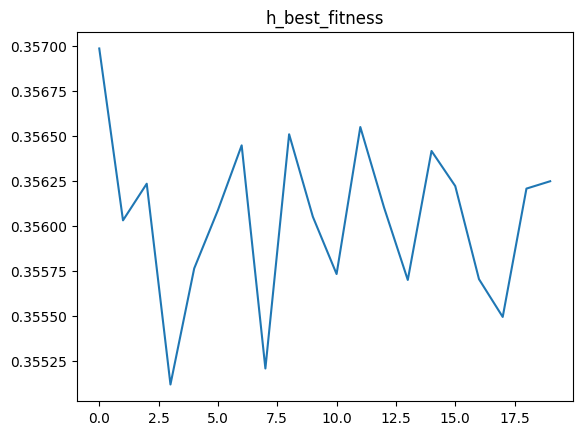

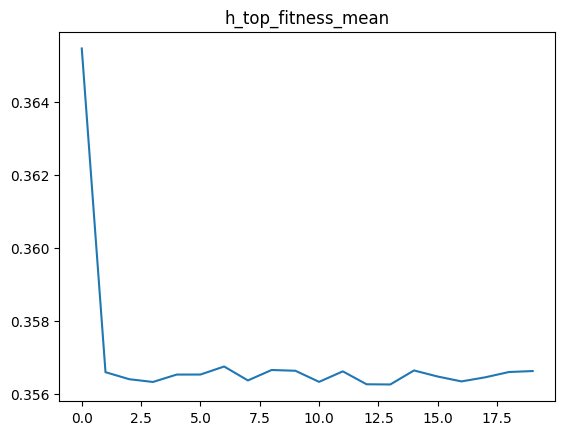

In [ ]:
# Gráfica para  h_best_fitness
plt.plot(h_best_fitness)
plt.title("h_best_fitness")
plt.show()
# Gráfica para  h_top_fitness_mean
plt.plot(h_top_fitness_mean)
plt.title("h_top_fitness_mean")
plt.show()

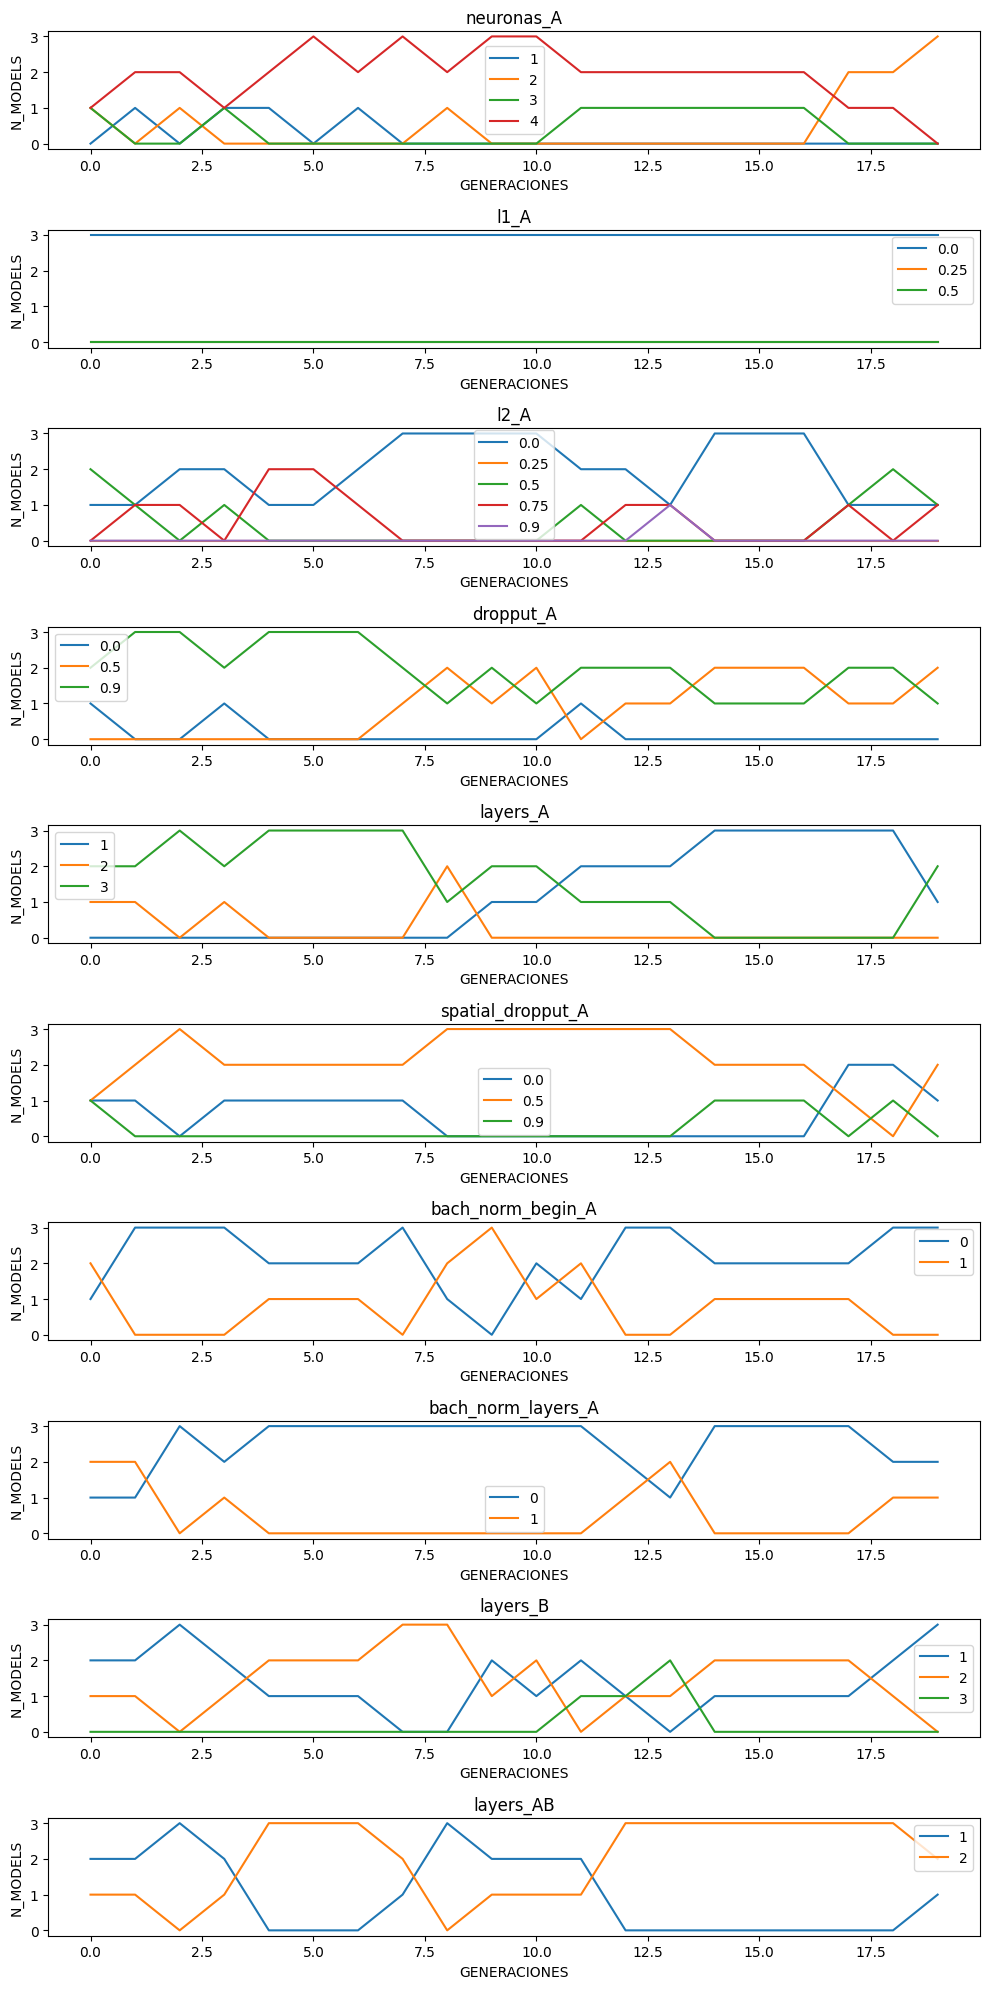

In [ ]:
h_best_pop.show_historical()

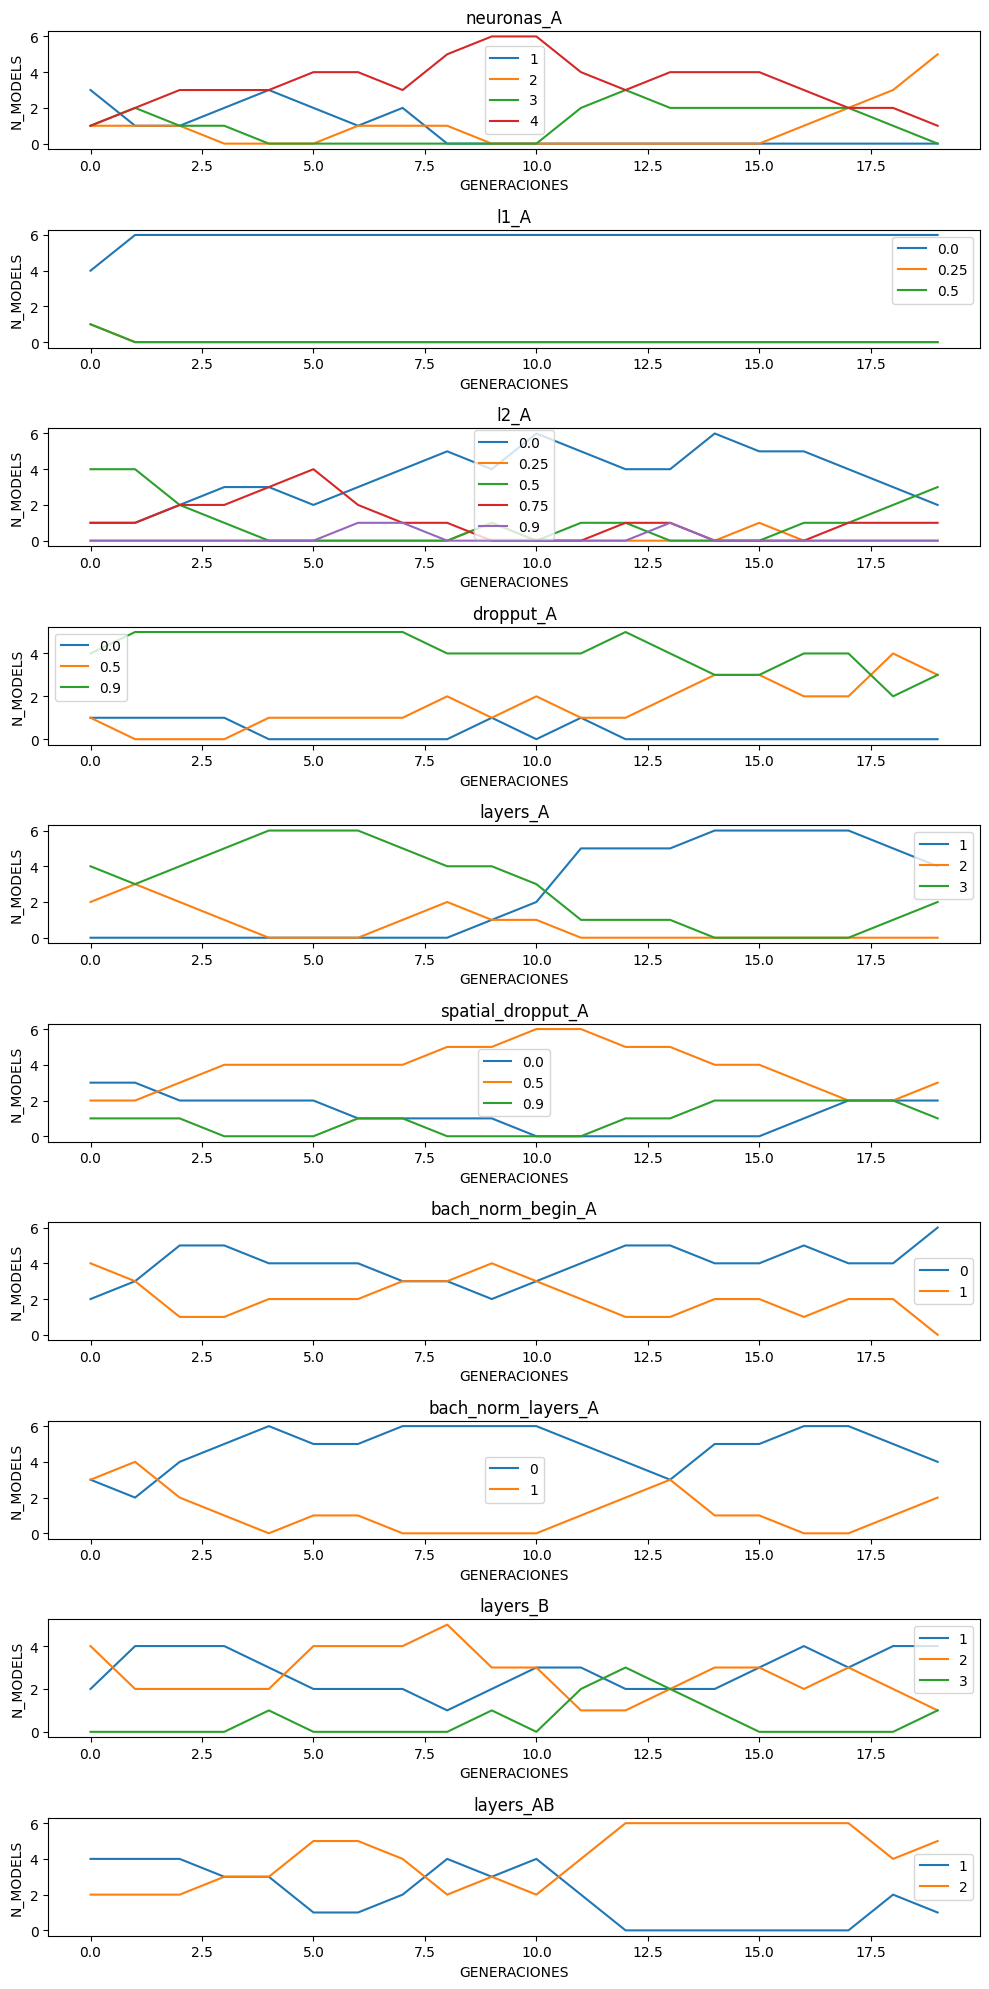

In [ ]:
h_parents.show_historical()

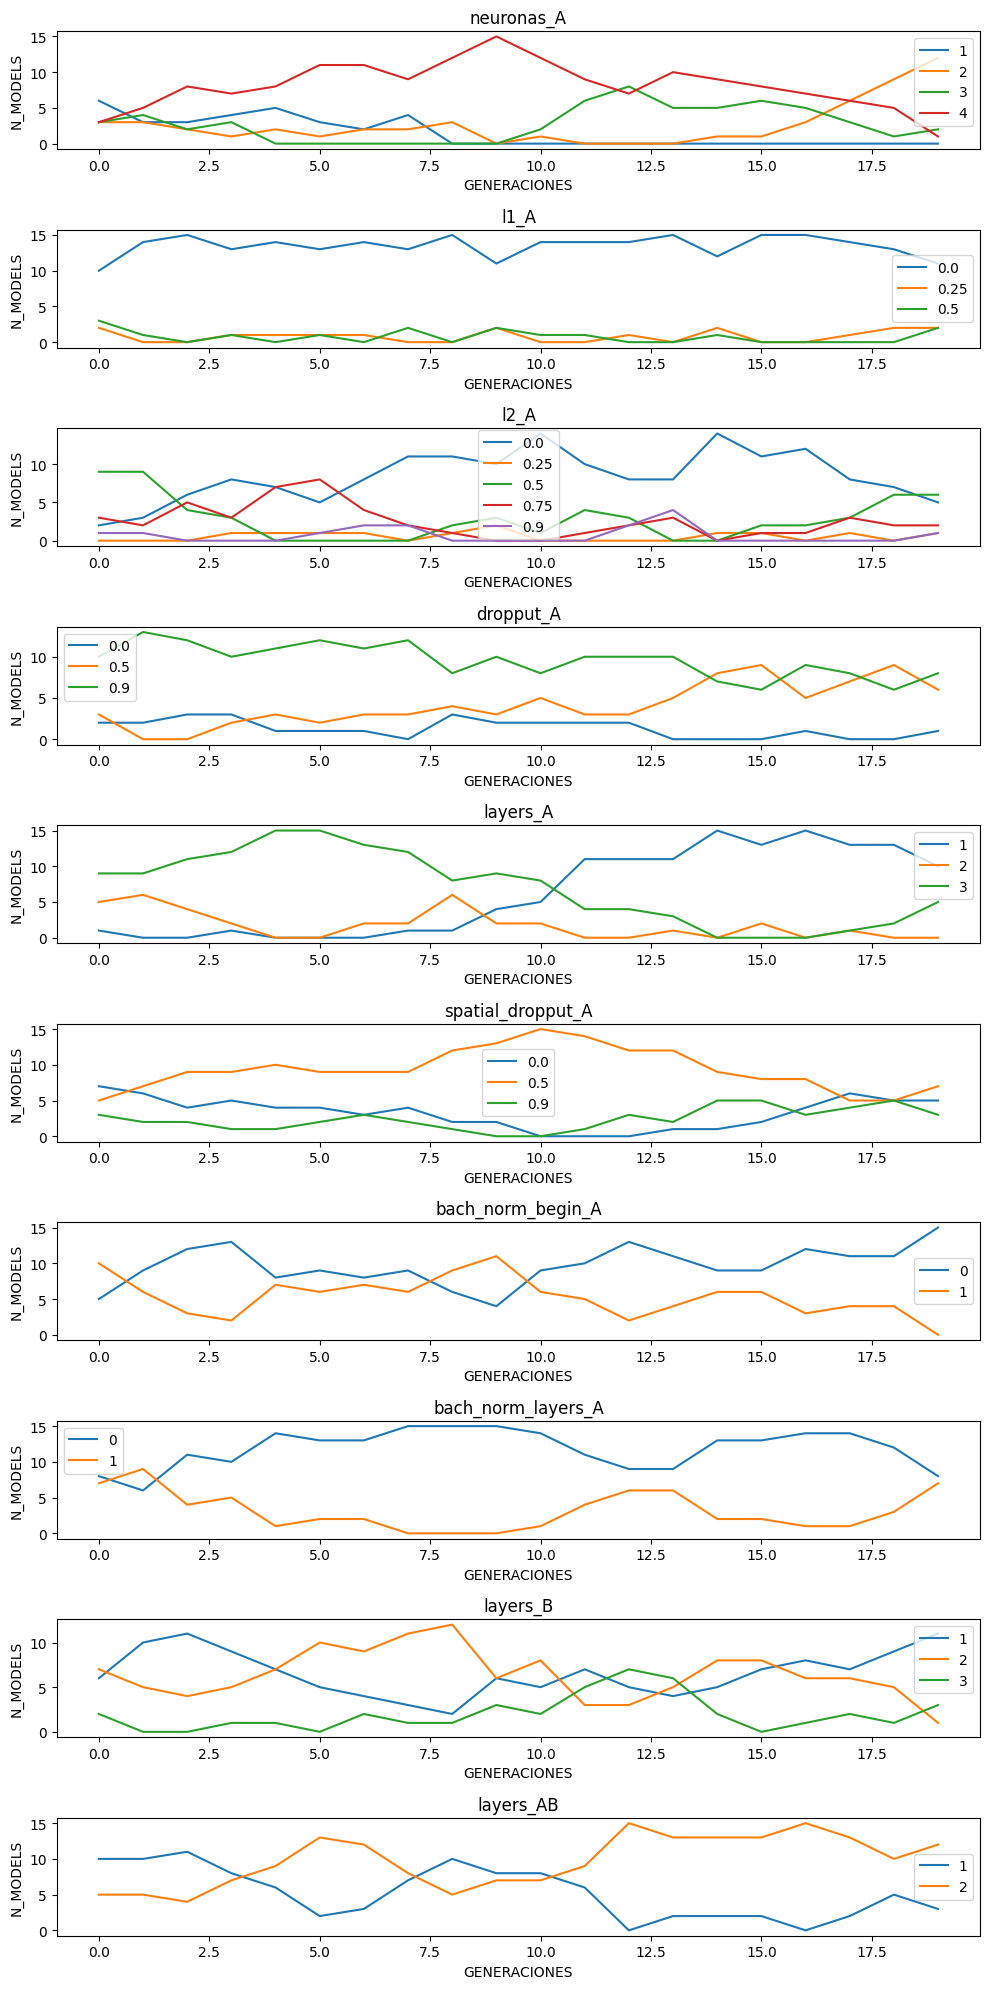

In [ ]:
h_pop.show_historical()

In [ ]:
"""
REFINA RUN PELIN EVO

HACER UNA PRUEBA TODO NORMAL DE SHARPE

HACER UNA PRUEBA PUTEANDO DE SHARPE

HACER PRUEBA COMPRANDO

"""

'\nREFINA RUN PELIN EVO\n\nHACER UNA PRUEBA TODO NORMAL DE SHARPE\n\nHACER UNA PRUEBA PUTEANDO DE SHARPE\n\nHACER PRUEBA COMPRANDO\n\n'

# Entrenamos los mejores

In [216]:
X_COMP_TRAIN.shape

(1646, 33, 8)

In [20]:
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [428]:
"""
[[2.   0.   0.5  0.9  1.   0.   0.   0.   1.   2.  ]
 [2.   0.   0.   0.5  3.   0.5  0.   1.   1.   2.  ]
 [2.   0.   0.75 0.5  3.   0.5  0.   0.   1.   1.  ]]
"""

model_a = create_model(
    [2.  , 0. ,  0.5 , 0.9 , 1. ,  0. ,  0. ,  0.  , 1. ,  2. ],
    X_COMP_TRAIN,
    Y_COMP_TRAIN,
    X_MACRO_TRAIN ,
    _learning_rate=0.01  )
model_a.summary()

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_83 (InputLayer)          [(None, 8, 8)]       0           []                               
                                                                                                  
 input_82 (InputLayer)          [(None, 33, 8)]      0           []                               
                                                                                                  
 spatial_dropout1d_57 (SpatialD  (None, 8, 8)        0           ['input_83[0][0]']               
 ropout1D)                                                                                        
                                                                                                  
 spatial_dropout1d_56 (SpatialD  (None, 33, 8)       0           ['input_82[0][0]']        

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose=1, restore_best_weights=True)

history_model_a = model_a.fit(
                              [X_COMP_TRAIN, X_MACRO_TRAIN],
                              Y_COMP_TRAIN,
                              epochs=2000,
                              batch_size= 1,
                              validation_data=( [X_COMP_VALID,X_MACRO_VALID] , Y_COMP_VALID),
                              verbose=1,
                              callbacks=[early_stopping]
                              )

# vemos predicciones

In [452]:
y_pred = model_a(X_COMP_TEST) #[X_COMP_TEST,X_MACRO_TEST]

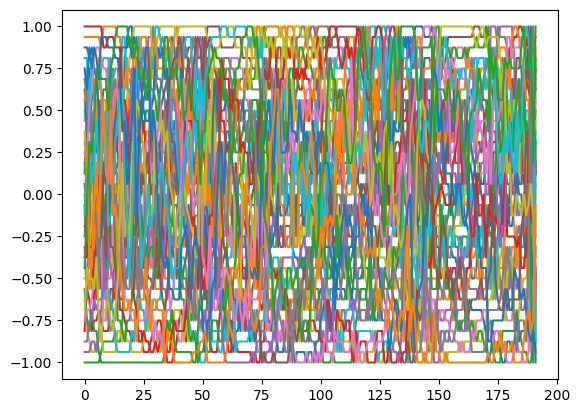

In [453]:
plt.plot(pd.DataFrame(Y_COMP_TRAIN , columns=data_componentes_IBEX.columns).iloc[:,:] );

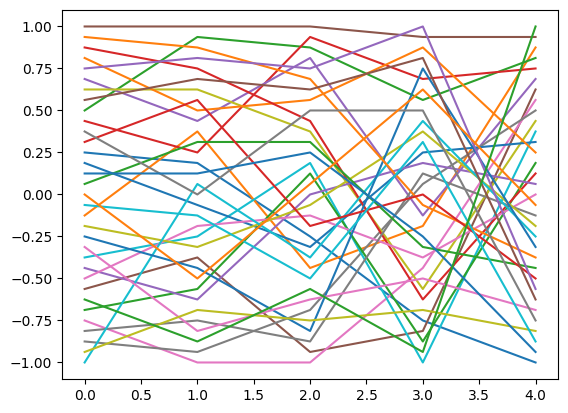

In [455]:
plt.plot(pd.DataFrame(Y_COMP_TEST , columns=data_componentes_IBEX.columns) );

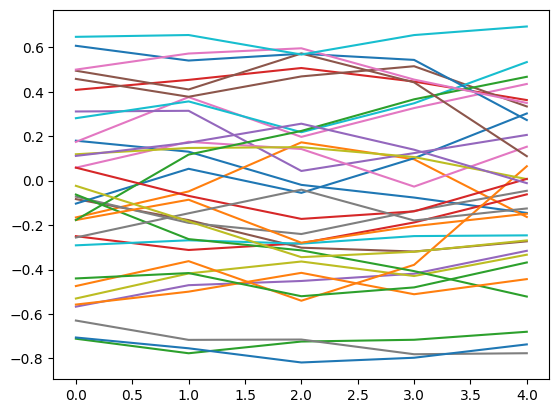

In [456]:
plt.plot((pd.DataFrame(y_pred , columns=data_componentes_IBEX.columns) ));

In [459]:
y_pred[3].numpy()

array([-0.07600047,  0.09614825, -0.7158493 , -0.18805079, -0.4186231 ,
       -0.31888416,  0.3265154 , -0.13628297, -0.4290677 , -0.2493986 ,
        0.10088281, -0.37873814, -0.40697214,  0.4458715 ,  0.12397872,
        0.5148406 , -0.02671239, -0.78090084,  0.10622402,  0.34815517,
        0.54325294, -0.20469247,  0.36590928, -0.13815857,  0.13927352,
        0.44237143,  0.45474228, -0.1791091 , -0.3198434 ,  0.6549849 ,
       -0.79666215, -0.5110127 , -0.4802328 ], dtype=float32)

In [291]:
y_pred[30].numpy().max(), y_pred[30].numpy().min()

(0.08436763, -0.06872961)

In [294]:
np.argsort(y_pred[30])

array([ 8,  3, 10, 12,  4,  9,  2, 16, 22, 20, 11, 13, 31, 26, 24,  7,  0,
       27, 29, 14, 25, 15, 18,  5, 30,  6, 21, 17, 19, 28,  1, 23, 32])

In [293]:
np.argsort(np.argsort(y_pred[30]))

array([16, 30,  6,  1,  4, 23, 25, 15,  0,  5,  2, 10,  3, 11, 19, 21,  7,
       27, 22, 28,  9, 26,  8, 31, 14, 20, 13, 17, 29, 18, 24, 12, 32])

In [295]:
np.where( np.argsort(np.argsort(y_pred[30])) < 5)

(array([ 3,  4,  8, 10, 12]),)

In [297]:
np.where( np.argsort(np.argsort(y_pred[15])) < 5)

(array([ 3,  4,  8,  9, 10]),)

In [296]:
np.where( np.argsort(np.argsort(y_pred[0])) < 5)

(array([ 3,  8,  9, 10, 12]),)

In [460]:
y_pred[0]

<tf.Tensor: shape=(33,), dtype=float32, numpy=
array([ 0.17980263, -0.1655317 , -0.711101  , -0.24972418, -0.5668664 ,
       -0.08295131,  0.17435433, -0.07185176, -0.5302616 , -0.29099873,
       -0.10329817, -0.4741284 , -0.06248568,  0.40841997,  0.31120646,
        0.4577692 ,  0.05820501, -0.62936854,  0.11876441,  0.2809825 ,
        0.60673434, -0.17718332, -0.17707735,  0.05860198,  0.11132746,
        0.4945823 ,  0.4995459 , -0.25577235, -0.02325735,  0.64702207,
       -0.7056493 , -0.5574852 , -0.43990692], dtype=float32)>

In [123]:
pd.DataFrame(X_COMP_TEST[0]).iloc[0:5, :]

0         1         2         3         4         5         6  \
0  0.020676 -0.483778  0.731999 -0.619142  0.184055 -0.140523  0.022609   
1  0.031709  0.209788  0.682229  0.197737  0.529041 -0.730957 -0.675145   
2  0.297512 -0.284687  1.000000 -0.587724  0.471595 -0.149109 -0.258177   
3  0.196835 -0.311252  0.912648 -0.574590  0.401101 -0.177489  0.201899   
4 -0.400950 -0.733637 -0.136349  0.098950 -0.324155 -0.752165 -0.140012   

          7  
0 -0.056883  
1 -0.138298  
2  0.168528  
3  0.133685  
4 -0.477907

In [136]:
Y_COMP_TEST[0]

array([ 0.8125, -0.125 ,  0.5625, -0.1875,  0.75  , -0.75  ,  0.5   ,
       -0.4375, -0.5625,  0.875 ,  1.    ,  0.625 ,  0.25  , -0.6875,
        0.125 ,  0.3125,  0.6875, -0.875 ,  0.9375, -1.    ,  0.0625,
       -0.5   , -0.375 , -0.25  ,  0.375 ,  0.    , -0.3125, -0.8125,
       -0.9375,  0.4375, -0.0625, -0.625 ,  0.1875])

<tf.Tensor: shape=(33,), dtype=float32, numpy=
array([-0.04457977,  0.07283568, -0.05630454, -0.06650309, -0.04118946,
        0.02531066, -0.0008652 , -0.02542071, -0.01794537, -0.07111604,
       -0.0678899 , -0.01625062, -0.02439162, -0.00188189,  0.01205726,
        0.04414563, -0.04431405,  0.06895304,  0.03419902,  0.04728201,
        0.0003737 ,  0.06866398, -0.01250258,  0.04110876, -0.05958474,
        0.01676641, -0.04155942, -0.01712053,  0.07994361,  0.00607367,
       -0.00677766, -0.03998258,  0.05850555], dtype=float32)>

In [131]:
pd.DataFrame(X_COMP_TEST[30])

0         1         2         3         4         5         6  \
0  -0.179025 -0.859776  0.516546 -1.000000 -0.473279  1.000000  0.019230   
1   0.087242 -0.606524  0.685408 -0.875225 -0.253902  0.353342  0.112708   
2   0.018368 -0.605705  0.806121 -0.711744 -0.310293 -0.143833  0.518942   
3  -0.045228 -0.660602  0.900789 -0.943345 -0.293460  0.676038  0.097831   
4  -0.316217 -0.983095 -0.252568 -0.627428 -0.825397 -0.389736  0.550348   
5  -0.280562 -0.620410  0.402245 -0.747104 -0.380106 -0.078836  0.462320   
6  -0.115693 -0.237148  0.707152 -0.335085 -0.109185 -0.604773 -0.356827   
7   0.202027 -0.066527  0.884554 -0.142615  0.126871 -0.710553 -0.719192   
8  -0.085284 -0.756534  0.603359 -0.911628 -0.560750  0.424901  0.639272   
9  -0.165695 -0.986701  0.312223 -0.907178 -0.655886  0.375678  0.777194   
10 -0.223087 -1.000000  0.071002 -0.796289 -0.795337 -0.047263  0.463279   
11 -0.313457 -1.000000  0.279971 -0.884642 -0.734581  0.256961  0.472775   
12 -0.647807 -0.841007 -0.266336 -0.459428 -0.778412 -0.582429  0.632733   
13 -0.035564 -0.761290  0.579400 -0.926370 -0.427886  0.538981  0.614485   
14  0.070596 -0.857997  0.402328 -0.800360 -0.624731  0.003805  0.362013   
15 -0.132972 -0.284017  0.572304 -0.359965 -0.204653 -0.595998  0.508218   
16 -0.184159 -0.953755  0.033703 -0.686104 -0.804906 -0.290344  0.740092   
17  0.455311 -0.491464  0.485901 -0.808072 -0.325011  0.097282  0.959600   
18 -0.641814 -1.000000 -0.219201 -0.726162 -0.822200 -0.217109  0.647770   
19 -0.325706 -0.834227  0.528360 -0.907507 -0.418557  0.448362  0.383148   
20 -0.438534 -0.783895  0.113547 -0.724908 -0.509621 -0.155926  0.361537   
21  0.275167 -0.461580  1.000000 -0.627522 -0.162286 -0.274098  0.517234   
22  0.092801 -0.723684  0.736722 -0.856188 -0.391179  0.241770  0.754222   
23  0.308048 -0.214710  0.753232 -0.503081 -0.083827 -0.436454  0.637719   
24 -1.000000 -0.963263 -1.000000  0.095020 -1.000000 -0.919390  0.540347   
25 -0.332450 -0.992797  0.111499 -0.823096 -0.746371  0.040528  0.549121   
26  0.118600 -0.654263  1.000000 -0.925838 -0.286565  0.580712  0.319689   
27  0.683931 -0.224127  0.860301 -0.502009 -0.105473 -0.440904  0.912462   
28  1.000000  1.000000  1.000000  1.000000  1.000000 -1.000000 -1.000000   
29 -0.127021 -0.446369  0.508956 -0.535284 -0.206900 -0.415266 -0.035648   
30 -0.302138 -0.725319  0.376572 -0.771454 -0.403381 -0.023468  0.156748   
31  0.004693 -0.778199 -0.158641 -0.422548 -0.720431 -0.608445  1.000000   
32  0.035611 -0.680230  0.847315 -0.806439 -0.321574  0.093163  0.143404   

           7  
0  -0.186946  
1   0.058050  
2  -0.035987  
3  -0.066090  
4  -0.354450  
5  -0.314480  
6  -0.100296  
7   0.225807  
8  -0.142524  
9  -0.228350  
10 -0.260227  
11 -0.346315  
12 -0.673715  
13 -0.093767  
14  0.024556  
15 -0.178258  
16 -0.243157  
17  0.345586  
18 -0.669122  
19 -0.351506  
20 -0.456603  
21  0.206843  
22  0.017599  
23  0.229335  
24 -1.000000  
25 -0.369705  
26  0.072942  
27  0.565019  
28  1.000000  
29 -0.133885  
30 -0.313101  
31 -0.083185  
32  0.007066

In [90]:
pd.DataFrame(X_COMP_TEST[1]).iloc[0:5, :]

0         1         2         3         4         5         6  \
0 -0.046083 -0.483778  0.731999 -0.582819  0.171277 -0.207507  0.013516   
1  0.055399  0.209788  0.682229  0.233248  0.502595 -0.750250 -0.689722   
2  0.276962 -0.284687  1.000000 -0.635821  0.460865 -0.085254 -0.266543   
3  0.095869 -0.311252  0.912648 -0.577505  0.384126 -0.185421  0.197172   
4 -0.363810 -0.733637 -0.136349  0.111316 -0.326281 -0.764999 -0.160746   

          7  
0 -0.124086  
1 -0.126719  
2  0.141313  
3  0.035411  
4 -0.447980

In [179]:
Y_COMP_TEST[0]

array([ 0.8125, -0.125 ,  0.5625, -0.1875,  0.75  , -0.75  ,  0.5   ,
       -0.4375, -0.5625,  0.875 ,  1.    ,  0.625 ,  0.25  , -0.6875,
        0.125 ,  0.3125,  0.6875, -0.875 ,  0.9375, -1.    ,  0.0625,
       -0.5   , -0.375 , -0.25  ,  0.375 ,  0.    , -0.3125, -0.8125,
       -0.9375,  0.4375, -0.0625, -0.625 ,  0.1875])